# Challenge 2

## Modèle de classification de la toxicité sur le Dataset de base

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
data = pd.read_csv('challenge_youtube_toxic.csv', sep=";", encoding = "ISO-8859-1")

In [154]:
pd.set_option('display.max_row', 28)
pd.set_option('display.max_column',28)

In [155]:
df = data.copy()

In [156]:
df.shape

(46102, 27)

In [157]:
df.drop(['video_id_court','video_id','channel_id'], axis=1, inplace=True)

## Apprentissage non supervisée

**L'idée est de regarder si notre modèle est capable de distinguer différentes classes.**

**Si c'est le cas cela pourra nous être utile pour définir nos classes de toxicité.**

**Méthode des Kmeans**

In [158]:
# K-means function
from sklearn.cluster import KMeans

In [159]:
#On fait le trie sur les variables pour utiliser la fonction Kmeans

X = df.drop(['categorie_new', 'categ_inst', 'channel_name'], axis=1)

n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

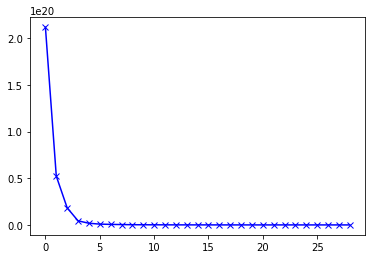

In [160]:
#On affiche les résultat de la fonction
plt.plot(cost, 'bx-')

**On peut remarquer qu'il ya un "coude" pour 1,2,3.**

**Où 1,2 et 3 définissent le nombre de classe qu'aurait trouvé le modèle en utilisant la méthode des Kmeans.**

**Prenons par exemple 3 classes :**

In [161]:
#On définit 3 classes avec la méthode des Kmeans

kmean= KMeans(3)
kmean.fit(X)
labels=kmean.labels_

In [162]:
#On ajoute dans la Dataframe les classes qu'a définit le modèle pour chaque lignes

clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,nbrExclMarkMoyenne,nbrQuestMarkMoyenne,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,channel_name,subscriberCount,viewCount,categorie_new,categ_inst,cluster
0,3813,18,4,145,79,60,30.261900,0.142857,0.031746,1.150794,0.626984,0.476190,45,81,126,28,58,47,23,LeHuffPost,339922,225393312,Core,Pure Players,2
1,28,2,0,1,0,0,9.333333,0.666667,0.000000,0.333333,0.000000,0.000000,3,0,3,0,3,1,0,CNEWS,189971,132125693,Core,TV,0
2,3804,68,9,56,75,54,27.565220,0.492754,0.065217,0.405797,0.543478,0.391304,52,86,138,22,83,49,36,LeHuffPost,339922,225393312,Core,Pure Players,2
3,4,0,1,2,0,0,2.000000,0.000000,0.500000,1.000000,0.000000,0.000000,2,0,2,0,2,0,0,Telegramme,2862,2481100,Niche,Presse_regionale,1
4,737,3,1,18,5,6,32.043478,0.130435,0.043478,0.782609,0.217391,0.260870,17,6,23,4,18,7,7,Les Echos,30010,6710737,Core,Presse nationale,1


In [163]:
#Proportion des classes
clusters['cluster'].value_counts()

1    23070
0    17712
2     5320
Name: cluster, dtype: int64

C:\Users\hervy\anaconda3\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


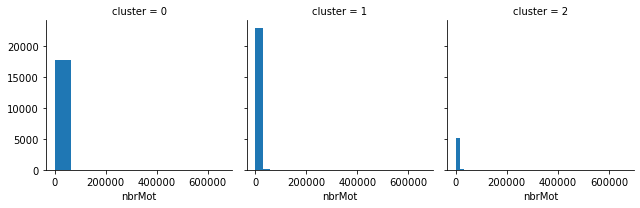

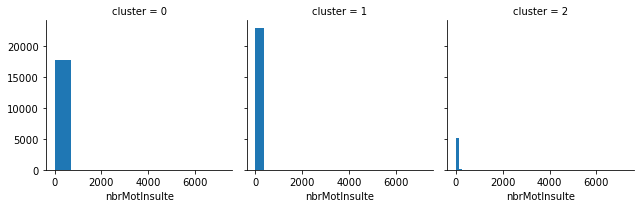

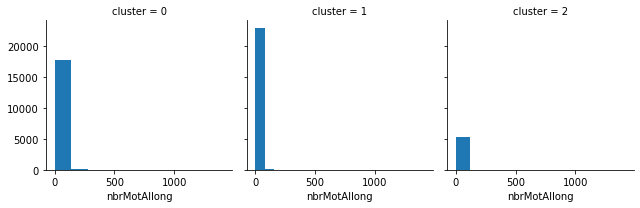

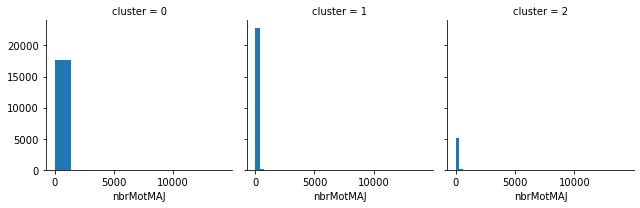

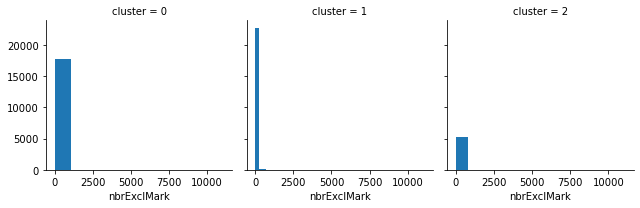

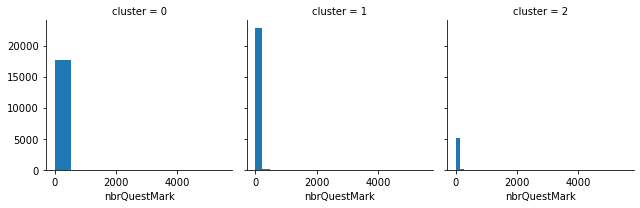

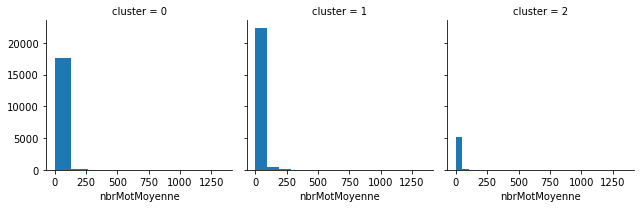

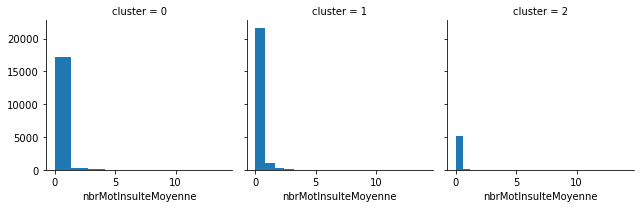

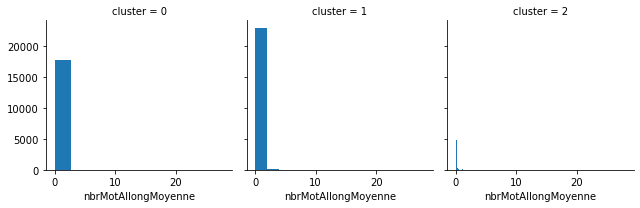

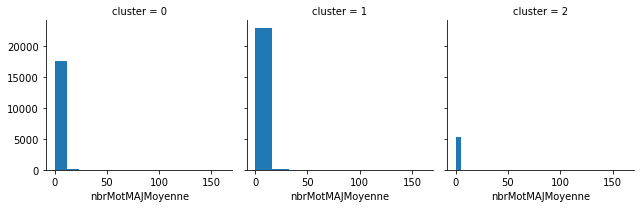

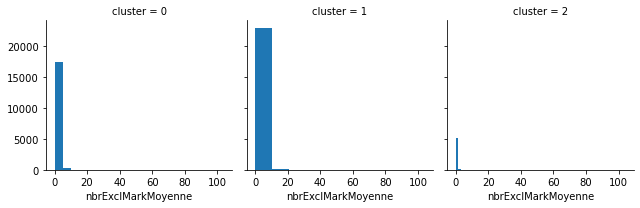

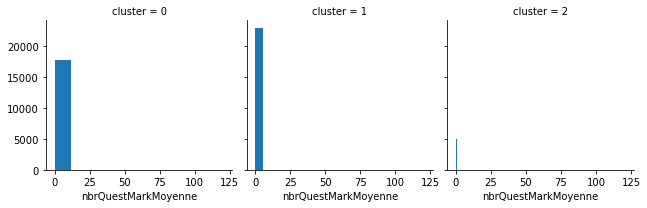

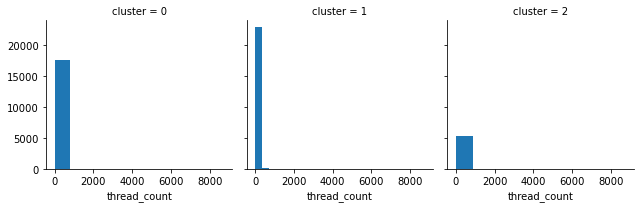

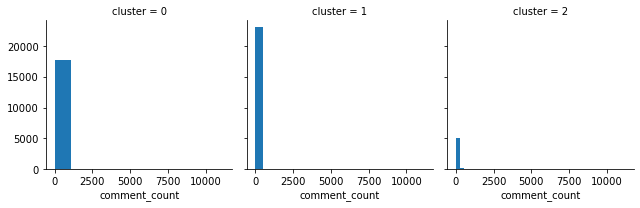

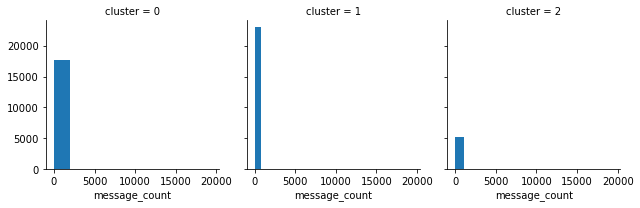

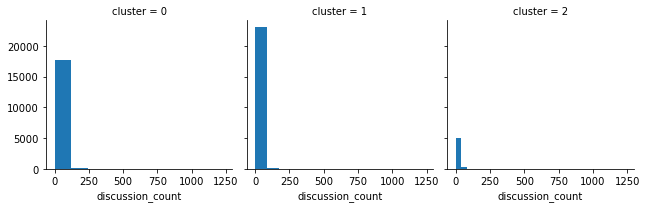

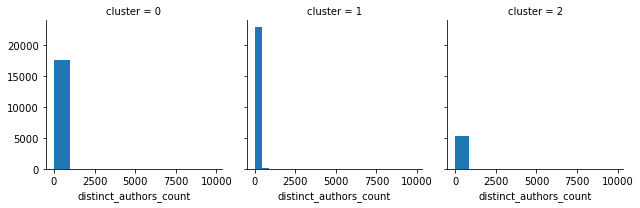

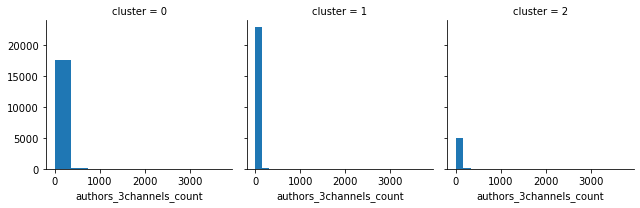

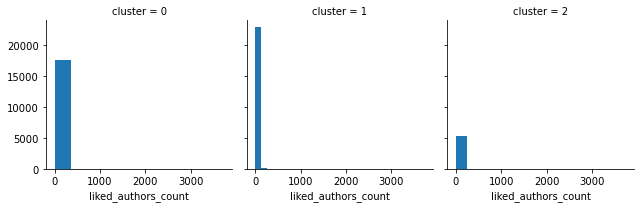

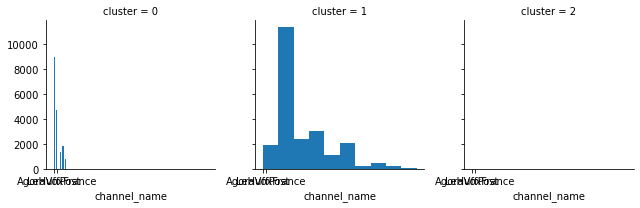

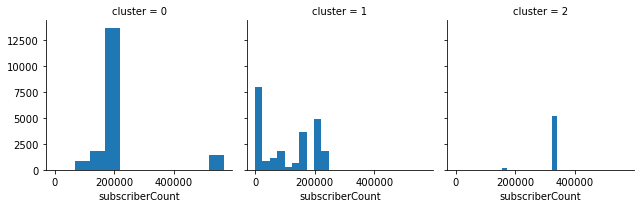

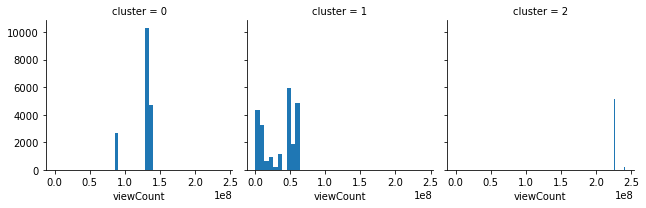

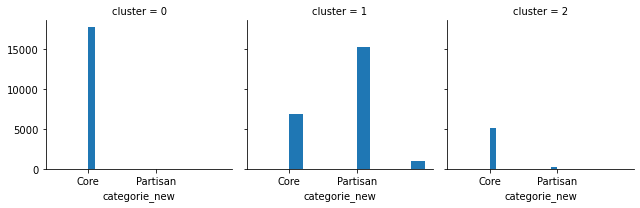

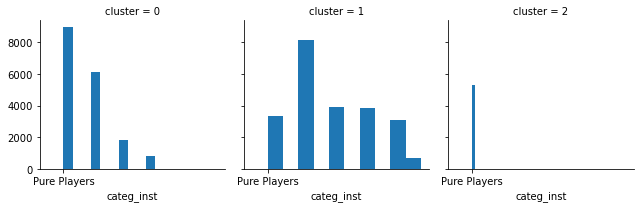

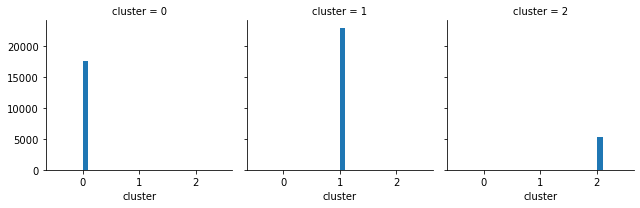

In [164]:
#Interprétation des classes
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

**Grâce à ce graphique on peut essayer de comprendre l'interprétation des classes qu'a définit le modèle avec la méthode des Kmeans.**

**Cependant on remarque très rapidement que beaucoup de varibles ont les mêmes graphiques et qu'il est donc impossible de les interpréter et donc d'en tirer des conclusions sur les classes qu'a définit notre modèle.**

**Il faut donc penser à une autre stratégie pour définir le nombre de classes de toxicité.**

## Encodage du Dataset

In [165]:
from sklearn.preprocessing import OneHotEncoder
categorical_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [166]:
#on crée une nouvelle dataframe (dftox) plus adaptée à 
#évaluer la toxicité d'une vidéo youtube

dftox= df.copy()
dftox['nbrMot'].replace(0,1,inplace=True)
dftox['nbrMotInsulte/nbrMot']=dftox['nbrMotInsulte']/dftox['nbrMot']
dftox['nbrMotAllong/nbrMot']=dftox['nbrMotAllong']/dftox['nbrMot']
dftox['nbrMotMAJ/nbrMot']=dftox['nbrMotMAJ']/dftox['nbrMot']
dftox['nbrExclMark/nbrMot']=dftox['nbrExclMark']/dftox['nbrMot']
dftox['nbrQuestMark/nbrMot']=dftox['nbrQuestMark']/dftox['nbrMot']
dftox=dftox.drop(['nbrMotMoyenne','nbrMot','nbrMotInsulte','nbrMotAllong','nbrMotMAJ','nbrExclMark','nbrQuestMark'] ,axis=1)

dftox['message_count'].replace(0,1,inplace=True)
dftox['comment_count/message_count']=dftox['comment_count']/dftox['message_count']
dftox['discussion_count/message_count']=dftox['discussion_count']/dftox['message_count']
dftox=dftox.drop(['message_count','comment_count','discussion_count','thread_count'],axis=1)


dftox=dftox.drop(['distinct_authors_count','authors_3channels_count','liked_authors_count'],axis=1)

dftox['subscriberCount'].replace(0,1,inplace=True)
dftox['viewCount/subscriberCount']=dftox['viewCount']/dftox['subscriberCount']
dftox=dftox.drop(['subscriberCount','viewCount'],axis=1)




dftox.dtypes

nbrMotInsulteMoyenne              float64
nbrMotAllongMoyenne               float64
nbrMotMAJMoyenne                  float64
nbrExclMarkMoyenne                float64
nbrQuestMarkMoyenne               float64
channel_name                       object
categorie_new                      object
categ_inst                         object
nbrMotInsulte/nbrMot              float64
nbrMotAllong/nbrMot               float64
nbrMotMAJ/nbrMot                  float64
nbrExclMark/nbrMot                float64
nbrQuestMark/nbrMot               float64
comment_count/message_count       float64
discussion_count/message_count    float64
viewCount/subscriberCount         float64
dtype: object

In [167]:

#Nous créeons une fonction qui attribura à la variable la valeur 1, 2 ou 3 en fonction de sa valeur et donc de son appartenance aux tranches 1, 2 ou 3

def f(x):
    if x<=5.7107*10**5:
        return(1)
    elif x<=1.1421*10**6:
        return(2)
    else: return(3)

#On applique cette fonction à l'ensemble des valeurs de la variable 'viewCount/subscriberCount'
dftox['viewCount/subscriberCount']=dftox['viewCount/subscriberCount'].apply(lambda x: f(x))

In [168]:
def f(x):
    if x<=54:
        return(1)
    elif x<=108:
        return(2)
    else: return(3)
dftox['nbrMotMAJMoyenne']=dftox['nbrMotMAJMoyenne'].apply(lambda x: f(x))

In [169]:
def f(x):
    if x<=9.33:
        return(1)
    elif x<=18.66:
        return(2)
    else: return(3)
dftox['nbrMotAllongMoyenne']=dftox['nbrMotAllongMoyenne'].apply(lambda x: f(x))

In [170]:
def f(x):
    if x<=4.66:
        return(1)
    elif x<=9.33:
        return(2)
    else: return(3)
dftox['nbrMotInsulteMoyenne']=dftox['nbrMotInsulteMoyenne'].apply(lambda x: f(x))

In [171]:
def f(x):
    if x<=34.66:
        return(1)
    elif x<=69.33:
        return(2)
    else: return(3)
dftox['nbrExclMarkMoyenne']=dftox['nbrExclMarkMoyenne'].apply(lambda x: f(x))

In [172]:
def f(x):
    if x<=40.25:
        return(1)
    elif x<=80.5:
        return(2)
    else: return(3)
dftox['nbrQuestMarkMoyenne']=dftox['nbrQuestMarkMoyenne'].apply(lambda x: f(x))

In [173]:
def f(x):
    if x<=0.4:
        return(1)
    elif x<=0.8:
        return(2)
    else: return(3)
dftox['nbrMotInsulte/nbrMot']=dftox['nbrMotInsulte/nbrMot'].apply(lambda x: f(x))

In [174]:
def f(x):
    if x<=0.33:
        return(1)
    elif x<=0.66:
        return(2)
    else: return(3)
dftox['nbrMotAllong/nbrMot']=dftox['nbrMotAllong/nbrMot'].apply(lambda x: f(x))

In [175]:
def f(x):
    if x<=0.34:
        return(1)
    elif x<=0.68:
        return(2)
    else: return(3)
dftox['nbrMotMAJ/nbrMot']=dftox['nbrMotMAJ/nbrMot'].apply(lambda x: f(x))

In [176]:
def f(x):
    if x<=7.5:
        return(1)
    elif x<=15:
        return(2)
    else: return(3)
dftox['nbrExclMark/nbrMot']=dftox['nbrExclMark/nbrMot'].apply(lambda x: f(x))

In [177]:
def f(x):
    if x<=6.66:
        return(1)
    elif x<=13.33:
        return(2)
    else: return(3)
dftox['nbrQuestMark/nbrMot']=dftox['nbrQuestMark/nbrMot'].apply(lambda x: f(x))

In [178]:
def f(x):
    if x<=0.32:
        return(1)
    elif x<=0.64:
        return(2)
    else: return(3)
dftox['comment_count/message_count']=dftox['comment_count/message_count'].apply(lambda x: f(x))

In [179]:
def f(x):
    if x<=0.16:
        return(1)
    elif x<=0.34:
        return(2)
    else: return(3)
dftox['discussion_count/message_count']=dftox['discussion_count/message_count'].apply(lambda x: f(x))

## Création de la variable toxicité

count    46102.000000
mean        40.789076
std          3.812727
min         38.000000
25%         38.000000
50%         38.000000
75%         42.000000
max         60.000000
Name: score, dtype: float64


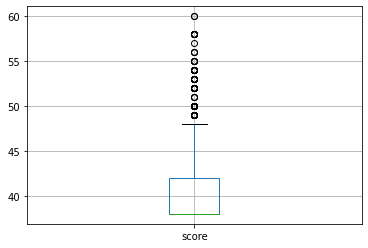

In [180]:
dftox['score']=(dftox['nbrMotInsulte/nbrMot']+dftox['nbrMotInsulteMoyenne'])*5+(dftox['comment_count/message_count']+dftox['discussion_count/message_count']+dftox['nbrMotMAJ/nbrMot'])*4 + (dftox['viewCount/subscriberCount']+dftox['nbrMotMAJMoyenne'])*3 +(dftox['nbrMotAllongMoyenne']+ dftox['nbrExclMarkMoyenne'] + dftox['nbrMotAllong/nbrMot']+ dftox['nbrExclMark/nbrMot'])*2 + (dftox['nbrQuestMark/nbrMot']+dftox['nbrQuestMarkMoyenne'])
dftox.boxplot(['score'])

#print(dftox['score'].quantile([0.33,0.66]))
print(dftox['score'].describe())

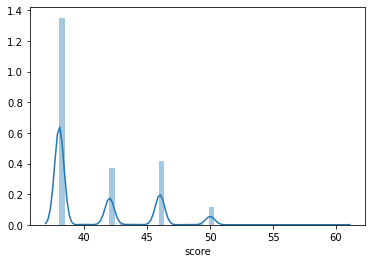

In [181]:
#Distribution de la variable score
sns.distplot(dftox['score'])

**En regardant la distribution du score de toxicité dans notre dataset, on obtient 4 pics, il est donc naturel de définir 4 classes de toxicité : 'peu toxique', 'assez toxique', 'toxique', 'très toxique'.**

In [182]:
#Création des classes de la toxicité

def f(x):
    if x<=40:
        return('peu toxique')
    elif x<=44:
        return('assez toxique')
    elif x<=48:
        return('toxique')
    else: return('très toxique')

dftox['toxic'] = dftox['score'].apply(lambda x: f(x))

In [183]:
dftox['toxic'].value_counts()

peu toxique      27507
toxique           8470
assez toxique     7674
très toxique      2451
Name: toxic, dtype: int64

# On ajoute la colonne toxicité à notre dataframe nettoyé initialement (cad Q1)

In [184]:
df['toxicité'] = dftox['toxic']

In [185]:
#On retrouve bien le dataset initial avec la colonne toxicité
df.columns

Index(['nbrMot', 'nbrMotInsulte', 'nbrMotAllong', 'nbrMotMAJ', 'nbrExclMark',
       'nbrQuestMark', 'nbrMotMoyenne', 'nbrMotInsulteMoyenne',
       'nbrMotAllongMoyenne', 'nbrMotMAJMoyenne', 'nbrExclMarkMoyenne',
       'nbrQuestMarkMoyenne', 'thread_count', 'comment_count', 'message_count',
       'discussion_count', 'distinct_authors_count', 'authors_3channels_count',
       'liked_authors_count', 'channel_name', 'subscriberCount', 'viewCount',
       'categorie_new', 'categ_inst', 'toxicité'],
      dtype='object')

In [186]:
#On change les 4 tranches de la variable toxicité en valeur quantifiée
df['toxicité'].replace(['peu toxique', 'assez toxique', 'toxique', 'très toxique'],[1,2,3,4], inplace=True)

In [188]:
df.head()

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,nbrExclMarkMoyenne,nbrQuestMarkMoyenne,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,channel_name,subscriberCount,viewCount,categorie_new,categ_inst,toxicité
0,3813,18,4,145,79,60,30.261900,0.142857,0.031746,1.150794,0.626984,0.476190,45,81,126,28,58,47,23,LeHuffPost,339922,225393312,Core,Pure Players,4
1,28,2,0,1,0,0,9.333333,0.666667,0.000000,0.333333,0.000000,0.000000,3,0,3,0,3,1,0,CNEWS,189971,132125693,Core,TV,1
2,3804,68,9,56,75,54,27.565220,0.492754,0.065217,0.405797,0.543478,0.391304,52,86,138,22,83,49,36,LeHuffPost,339922,225393312,Core,Pure Players,2
3,4,0,1,2,0,0,2.000000,0.000000,0.500000,1.000000,0.000000,0.000000,2,0,2,0,2,0,0,Telegramme,2862,2481100,Niche,Presse_regionale,2
4,737,3,1,18,5,6,32.043478,0.130435,0.043478,0.782609,0.217391,0.260870,17,6,23,4,18,7,7,Les Echos,30010,6710737,Core,Presse nationale,2


**On encode les variables "categ_int" et "categorie_new"**

In [145]:
from sklearn.preprocessing import OneHotEncoder
categorical_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [146]:
categorical_columns = pd.DataFrame(categorical_encoder.fit_transform(df[['categ_inst','categorie_new']]))

In [147]:
categorical_columns.index = df.index

In [148]:
categorical_encoder.categories_

[array(['Alternatif', 'Presse magazine', 'Presse nationale',
        'Presse_regionale', 'Pure Players', 'TV'], dtype=object),
 array(['Core', 'Niche', 'Partisan'], dtype=object)]

In [149]:
categorical_columns.columns =  ['Alternatif', 'Presse magazine', 'Presse nationale',
        'Presse_regionale', 'Pure Players', 'TV', 'Core', 'Niche', 'Partisan']

In [150]:
categorical_columns.head()

,Alternatif,Presse magazine,Presse nationale,Presse_regionale,Pure Players,TV,Core,Niche,Partisan
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [151]:
df_encoder = pd.concat([df, categorical_columns], axis=1)

In [122]:
df_encoder.drop(['categorie_new', 'categ_inst', 'channel_name'], axis=1, inplace=True)

In [123]:
df_encoder.head()

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,nbrExclMarkMoyenne,nbrQuestMarkMoyenne,thread_count,comment_count,...,authors_3channels_count,liked_authors_count,subscriberCount,viewCount,toxicité,Alternatif,Presse magazine,Presse nationale,Presse_regionale,Pure Players,TV,Core,Niche,Partisan
0,3813,18,4,145,79,60,30.261900,0.142857,0.031746,1.150794,0.626984,0.476190,45,81,...,47,23,339922,225393312,4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,28,2,0,1,0,0,9.333333,0.666667,0.000000,0.333333,0.000000,0.000000,3,0,...,1,0,189971,132125693,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3804,68,9,56,75,54,27.565220,0.492754,0.065217,0.405797,0.543478,0.391304,52,86,...,49,36,339922,225393312,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,0,1,2,0,0,2.000000,0.000000,0.500000,1.000000,0.000000,0.000000,2,0,...,0,0,2862,2481100,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,737,3,1,18,5,6,32.043478,0.130435,0.043478,0.782609,0.217391,0.260870,17,6,...,7,7,30010,6710737,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


**Création du Train set et Test set**

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
train_set, test_set = train_test_split(df_encoder, test_size = 0.2, random_state = 0)

In [126]:
def preprocessing(df):
    
    X = df.drop('toxicité', axis=1)
    y = df['toxicité']
    
    print(X.shape, y.shape)
    return X,y

In [127]:
X_train, y_train = preprocessing(train_set) 

(36881, 30) (36881,)


In [128]:
X_test, y_test = preprocessing(test_set) 

(9221, 30) (9221,)


## Modélisation

**Nous allons déterminer quel modèle de classification est le plus efficace**

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

In [135]:
model_a = DecisionTreeClassifier(random_state=0)
model_b = KNeighborsClassifier(n_neighbors=2)
model_c = SVC()
model_d = RandomForestClassifier()
model_e = LogisticRegression()
model_f = GradientBoostingClassifier()
model_g = GaussianNB()

In [136]:
dict_of_models = {'DecisionTree': model_a,
                 'KNeighbors': model_b,
                 'SVM': model_c, 
                 'RandomForest': model_d, 
                 'LogisticRegression': model_e,
                 'GradientBoosting' : model_f, 
                 'GaussianNB' : model_g}

In [137]:
for name, model in dict_of_models.items():
    
    model.fit(X_train,y_train)
    print(name)
    print(model.score(X_test, y_test))

DecisionTree
0.9706105628456784
KNeighbors
0.6905975490727687
SVM
0.5919097711744931
RandomForest
0.9465350829628023
LogisticRegression
0.5902830495607851
GradientBoosting
0.9341719986986227
GaussianNB
0.6239019629107472


In [138]:
dict_of_models_performant = {'DecisionTree': model_a,
                 'RandomForest': model_d, 
                 'GradientBoosting' : model_f}

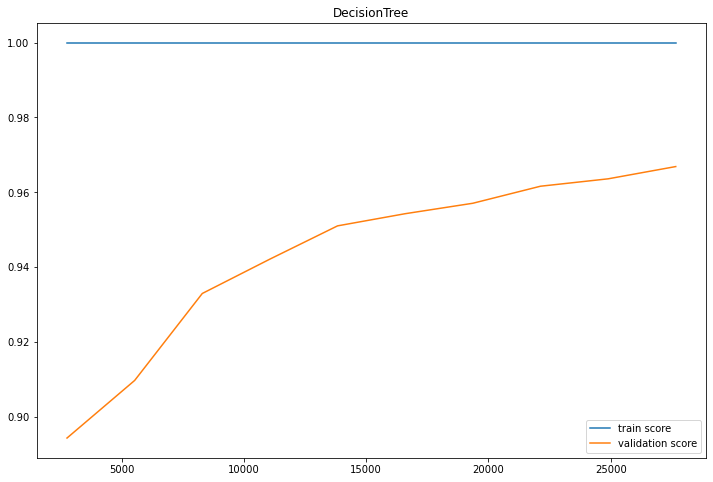

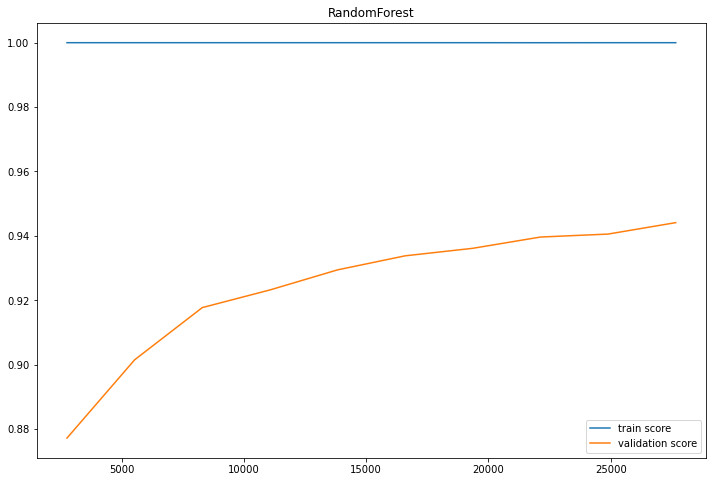

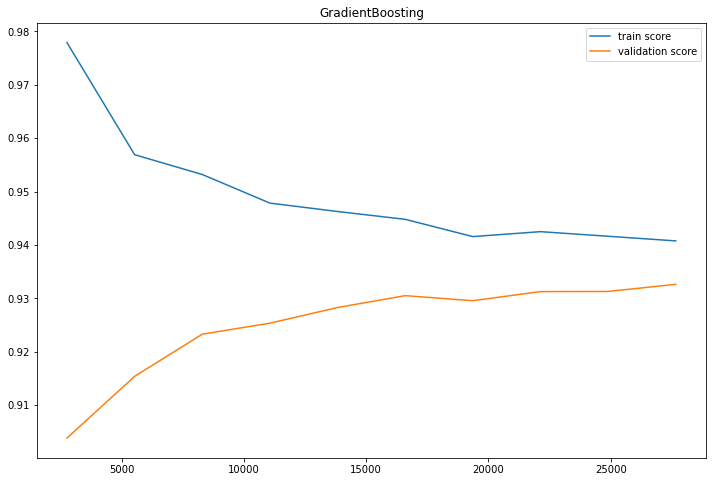

In [139]:
for name, model in dict_of_models_performant.items():
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                          cv=4, train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.title(name)

**On peut remarquer que les modèles de decisionTree et RandomForest sont en Over-Fitting.**

**Néanmoins on obtient un excellent score avec le GradientBoosting sans avoir d'over-fitting (le trainscore se rapproche du valid score)**

In [140]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [141]:
model_f = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[5382   76    0    0]
 [  87 1341  174    0]
 [   8  118 1561    5]
 [   0    2  138  329]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      5458
           2       0.87      0.84      0.85      1602
           3       0.83      0.92      0.88      1692
           4       0.99      0.70      0.82       469

    accuracy                           0.93      9221
   macro avg       0.92      0.86      0.88      9221
weighted avg       0.94      0.93      0.93      9221



**En plus d'avoir un modèle avec un bon score, on peut également voir que nous avons une bonne précision, un bon recall et un bon f1-score.**

**Nous avons réussi à définir un modèle précis capable de classifier si la vidéo youtube sera toxique ou non.**